# Real or Not? NLP with Disaster Tweets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Importing and exploring train data set

In [2]:
train = pd.read_csv('train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [5]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

### Importing and exploring test data set

In [6]:
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
id          3263 non-null int64
keyword     3237 non-null object
location    2158 non-null object
text        3263 non-null object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [7]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [8]:
test.tail()

,id,keyword,location,text
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...
3262,10875,NaN,NaN,#CityofCalgary has activated its Municipal Eme...


In [9]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

### Futher exploratin of train set

In [10]:
#Viewing tweets that were labeled as non-disastrous
train[train['target'] == 0]

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0
18,26,NaN,NaN,My car is so fast,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0
...,...,...,...,...,...
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0
7582,10834,wrecked,NaN,Cramer: Iger's 3 words that wrecked Disney's s...,0
7584,10837,NaN,NaN,These boxes are ready to explode! Exploding Ki...,0
7587,10841,NaN,NaN,Sirens everywhere!,0


In [11]:
#Viewing tweets that were labeled as disastrous
train[train['target'] == 1]

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [12]:
#Viewing the first tweet in full
train['text'].values[0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [13]:
#Number of unique values for location
train['location'].nunique()

3341

In [14]:
#Viewing least frequent used locations for train set
train['location'].value_counts()[3000:]

on to the next adventure    1
The Internet & NYC          1
Houston, Texas !            1
my deli                     1
lee london                  1
                           ..
Rock Springs, WY            1
IUPUI '19                   1
pettyville, usa             1
Loveland Colorado           1
Trancy Manor                1
Name: location, Length: 341, dtype: int64

In [15]:
#Viewing most frequent used locations for train set
train['location'].value_counts()[:100]

USA              104
New York          71
United States     50
London            45
Canada            29
                ... 
Pakistan           5
Tampa, FL          5
WorldWide          5
Philippines        5
Coventry           5
Name: location, Length: 100, dtype: int64

In [16]:
#Viewing least frequent used locations for test set
test['location'].value_counts()[1000:]

finland                      1
Trujillo, Peru               1
Citizen of the World         1
Bangalore                    1
Cincinnati                   1
                            ..
In my baby with pie          1
Hustle Flow Nation           1
In outer space               1
ÌÏT: 41.373061,-71.942237    1
magodo                       1
Name: location, Length: 602, dtype: int64

In [17]:
#Viewing most frequent used locations for test set
test['location'].value_counts()[:100]

New York             38
USA                  37
Worldwide            16
United States        15
Canada               13
                     ..
Chicago, Illinois     2
Arizona, USA          2
Puerto Rico           2
Lynchburg, VA         2
Ontario CA            2
Name: location, Length: 100, dtype: int64

### Data visualization

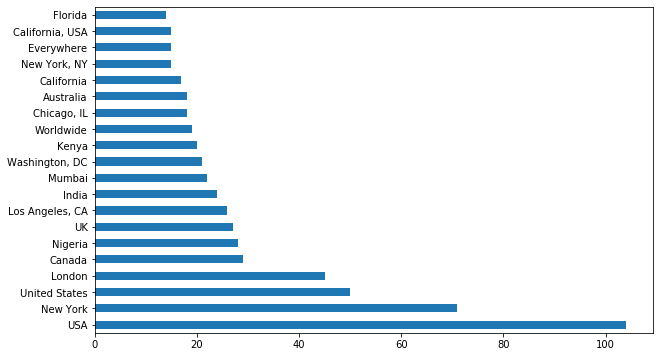

In [18]:
#Viewing the top 20 frequently used location
train.location.value_counts()[:20].plot(kind = 'barh', figsize = (10, 6))

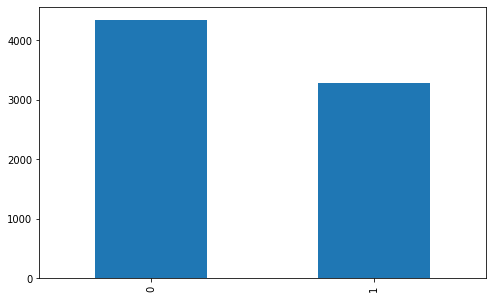

In [19]:
#Viewing distribution of non-disastrous vs. disastrous tweets
train['target'].value_counts().plot(kind = 'bar', figsize = (8, 5))

### Data cleaning and preparation

In [20]:
#Appending train and test set 
df = train.append(test, sort = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10876 entries, 0 to 3262
Data columns (total 5 columns):
id          10876 non-null int64
keyword     10789 non-null object
location    7238 non-null object
text        10876 non-null object
target      7613 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 509.8+ KB


In [21]:
#Dropping location attribute due to high amount of nulls and random locations
df.drop('location', axis = 1, inplace = True)

In [22]:
#Removing URLs
import re
df['text'] = df['text'].apply(lambda x: re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', x, flags = re.MULTILINE))

In [23]:
#Removing puncuations
df['text'].replace('[^a-zA-z0-9\s\w]', '', regex = True, inplace = True)

In [24]:
#Adding word count of each tweet as an attribute
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

In [25]:
df.head()

,id,keyword,text,target,word_count
0,1,NaN,Our Deeds are the Reason of this earthquake Ma...,1.0,13
1,4,NaN,Forest fire near La Ronge Sask Canada,1.0,7
2,5,NaN,All residents asked to shelter in place are be...,1.0,22
3,6,NaN,13000 people receive wildfires evacuation orde...,1.0,8
4,7,NaN,Just got sent this photo from Ruby Alaska as s...,1.0,16


In [26]:
import nltk

#Adding tokenized text as an attribute
df['tokenized'] = df['text'].apply(lambda x: nltk.word_tokenize(x.lower()))

In [27]:
from textblob import TextBlob, Word
from nltk.corpus import stopwords

In [28]:
#List of stopwords
stop_words = list(stopwords.words('english'))
print (stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [29]:
#Removing stopwords and adding new lists as attribute
df['stopwords_removal'] = df['tokenized'].apply(lambda x: [word for word in x if word not in stop_words])

In [30]:
from nltk.stem import WordNetLemmatizer, PorterStemmer

#Lemmatizing and Stemming lists of words and adding new lists as attribute
df['lem_stem'] = df['stopwords_removal'].apply(lambda x: [Word(w).lemmatize() for w in x])
df['lem_stem'] = df['lem_stem'].apply(lambda x: [PorterStemmer().stem(w) for w in x])

In [31]:
#Adding subjectivity and polarity of tweets as new attributes
df['subjectivity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [32]:
df.head(10)

,id,keyword,text,target,word_count,tokenized,stopwords_removal,lem_stem,subjectivity,polarity
0,1,NaN,Our Deeds are the Reason of this earthquake Ma...,1.0,13,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquak, may, allah, forgiv, u]",0.0000,0.00000
1,4,NaN,Forest fire near La Ronge Sask Canada,1.0,7,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]",0.4000,0.10000
2,5,NaN,All residents asked to shelter in place are be...,1.0,22,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev...",0.3875,-0.01875
3,6,NaN,13000 people receive wildfires evacuation orde...,1.0,8,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ...",0.0000,0.00000
4,7,NaN,Just got sent this photo from Ruby Alaska as s...,1.0,16,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi...",0.0000,0.00000
5,8,NaN,RockyFire Update California Hwy 20 closed in ...,1.0,16,"[rockyfire, update, california, hwy, 20, close...","[rockyfire, update, california, hwy, 20, close...","[rockyfir, updat, california, hwi, 20, close, ...",0.2375,-0.11250
6,10,NaN,flood disaster Heavy rain causes flash floodin...,1.0,14,"[flood, disaster, heavy, rain, causes, flash, ...","[flood, disaster, heavy, rain, causes, flash, ...","[flood, disast, heavi, rain, caus, flash, floo...",0.5000,-0.20000
7,13,NaN,Im on top of the hill and I can see a fire in ...,1.0,15,"[im, on, top, of, the, hill, and, i, can, see,...","[im, top, hill, see, fire, woods]","[im, top, hill, see, fire, wood]",0.5000,0.50000
8,14,NaN,Theres an emergency evacuation happening now i...,1.0,12,"[theres, an, emergency, evacuation, happening,...","[theres, emergency, evacuation, happening, bui...","[there, emerg, evacu, happen, build, across, s...",0.0000,0.00000
9,15,NaN,Im afraid that the tornado is coming to our area,1.0,10,"[im, afraid, that, the, tornado, is, coming, t...","[im, afraid, tornado, coming, area]","[im, afraid, tornado, come, area]",0.9000,-0.60000


In [33]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [34]:
vect = CountVectorizer()

#Joining list of words in attribute lem-stem into a string for count vectorizing
df['lem_stem'] = df['lem_stem'].apply(lambda x: ' '.join(x))

In [35]:
count_vect = vect.fit_transform(df['lem_stem'])

In [36]:
count_vect.shape

(10876, 18820)

In [37]:
#Printing list of words from count vectorizing
print (vect.vocabulary_)

{'deed': 4806, 'reason': 13576, 'earthquak': 5532, 'may': 10545, 'allah': 1403, 'forgiv': 6593, 'forest': 6586, 'fire': 6398, 'near': 11458, 'la': 9572, 'rong': 14086, 'sask': 14406, 'canada': 3298, 'resid': 13811, 'ask': 1874, 'shelter': 14816, 'place': 12799, 'notifi': 11799, 'offic': 11979, 'evacu': 5967, 'order': 12181, 'expect': 6040, '13000': 167, 'peopl': 12588, 'receiv': 13598, 'wildfir': 18097, 'california': 3247, 'got': 7202, 'sent': 14659, 'photo': 12702, 'rubi': 14190, 'alaska': 1331, 'smoke': 15188, 'pour': 12974, 'school': 14496, 'rockyfir': 14037, 'updat': 17354, 'hwi': 8155, '20': 321, 'close': 3884, 'direct': 5070, 'due': 5442, 'lake': 9597, 'counti': 4283, 'cafir': 3213, 'flood': 6492, 'disast': 5089, 'heavi': 7702, 'rain': 13435, 'caus': 3468, 'flash': 6456, 'street': 15745, 'manit': 10377, 'colorado': 4015, 'spring': 15500, 'area': 1753, 'im': 8327, 'top': 16789, 'hill': 7838, 'see': 14600, 'wood': 18231, 'there': 16460, 'emerg': 5718, 'happen': 7545, 'build': 3077,

In [38]:
#t_vect = TfidfVectorizer()
#tfidf_vect = t_vect.fit_transform(train['lem_stem'])

In [39]:
#tfidf_vect.todense()

In [40]:
#Turn count vectorizer of tweets into sparse matrix
cv = count_vect.todense()

### Data preparation for model

In [41]:
#Splitting the train and test sets
train = cv[:7613]
test = cv[7613:]

In [42]:
#Assigning the sparse matrix from count vectorizer in variable x and target in variable y
x = train
y = df['target'][:7613]

In [43]:
print (x.shape)
print (y.shape)

(7613, 18820)
(7613,)


### Training models

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

In [46]:
#These are the chosen algorithms for training
log = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()

In [47]:
algorithms = [log, dtc, rfc, gbc]
names = ['log', 'dtc', 'rfc', 'gbc']

In [48]:
#Function to train models with the chosen algorithms and to output performance scores from each algorithm
def classification():
    accuracy = []
    precision = []
    recall = []
    f1 = []
    
    for a in range(len(algorithms)):
        algorithms[a].fit(x_train, y_train)
    
    for a in range(len(algorithms)):
        accuracy.append(accuracy_score(y_test, algorithms[a].predict(x_test)))
        precision.append(precision_score(y_test, algorithms[a].predict(x_test)))
        recall.append(recall_score(y_test, algorithms[a].predict(x_test)))
        f1.append(f1_score(y_test, algorithms[a].predict(x_test)))
        
    met = pd.DataFrame(index = names, columns = ['Accuracy', 'Precision', 'Recall', 'F1'])
    met['Accuracy'] = accuracy
    met['Precision'] = precision
    met['Recall'] = recall
    met['F1'] = f1
    return met

In [49]:
#Trained and presented scores for each chosen algorithm
classification()

,Accuracy,Precision,Recall,F1
log,0.789888,0.798261,0.692308,0.741519
dtc,0.750492,0.730832,0.675716,0.702194
rfc,0.790545,0.826996,0.656109,0.731707
gbc,0.747209,0.867725,0.494721,0.630163


### Predicting test set

In [50]:
#Using logistic regression to predict test set since logistic regression presented with higher F1 score
y_pred = log.predict(test)
y_pred

array([1., 1., 1., ..., 1., 1., 0.])

In [51]:
#Creating dataframe with the id from test set
test_pred = pd.DataFrame(data = df['id'][7613:], columns = ['id'])

In [52]:
#Added predicted targets to dataframe for submitting
test_pred['target'] = y_pred
test_pred.head()

,id,target
0,0,1.0
1,2,1.0
2,3,1.0
3,9,1.0
4,11,1.0


In [53]:
#Converting dtype of target from float to integer
test_pred['target'] = test_pred['target'].astype('int')

In [54]:
#Export dataframe of results as csv
test_pred.to_csv('NLP_results.csv', index = False)